# Анализ маркетинговой стратегии развлекательного приложения Procrastinate Pro+.

## Описание проекта

Несколько прошлых месяцев бизнес связанный с развитием приложения Procrastinate Pro+ постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Неоходимо разобраться в причинах этой ситуации.
 
Цель: выявить факторы, которые отрицательно влияют на привлечение пользователей

Для анализа маркетинговой стратегии предлагается взять лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27. Данные содержат выгрузку их покупок за указанный период, а также рекламные расходы.

*Описание данных*

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Шаг 1. Обзор и подготовка данных к анализу

In [72]:
#подключаем библитеки для работы с данными
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [73]:
#загрузим данные о визитах, заказах и расходах в переменные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [74]:
#откроем таблицы и изучим общую информацию 
display(visits.head(5))
print(visits.info())
display(orders.head(5))
print(orders.info())
display(costs.head(5))
print(costs.info())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


### Вывод
 - во всех таблицах необходимо привести данные со временем к типу datetime
 - привести название колонок в соответствие со стилем 

In [75]:
#перепишем название колонок и приведем данные со временем к типу datetime в visits
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
display(visits.head(5))
visits.info()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [76]:
#перепишем название колонок и приведем данные со временем к типу datetime в orders
orders.columns = ['user_id', 'event_dt', 'revenue']
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
display(orders.head(5))
orders.info()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [77]:
#перепишем название колонок и приведем данные со временем к типу datetime в costs
costs.columns = ['dt', 'channel', 'costs']
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
display(costs.head(5))
costs.info()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [78]:
#проверим данные на наличие явных дубликатов
print('Количество полных дубликатов в visits:', visits.duplicated().sum())
print('Количество полных дубликатов в orders:', orders.duplicated().sum())
print('Количество полных дубликатов в costs:', costs.duplicated().sum())

Количество полных дубликатов в visits: 0
Количество полных дубликатов в orders: 0
Количество полных дубликатов в costs: 0


### Вывод
Все необходимые данные загружены, проверены на наличие пропупусков и явных дубликатов. Для дальнейшей обработки данных был изменен тип данных на datetime и перезаписаны названия колонок.

## Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

In [79]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [80]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [81]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [82]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 


# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [83]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [84]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Исследовательский анализ данных


**Пользовательские профили**

In [85]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start']).groupby('user_id').agg({
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first'}
        ).rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    profiles['dt'] = profiles['first_ts'].dt.date
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    return profiles

In [86]:
#построим профили пользователей
user_profiles = get_profiles(visits, orders)
user_profiles.head(5)

,user_id,first_ts,channel,device,region,dt,payer
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,True
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,False
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,False
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,False
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,False


**Минимальная и максимальная дата привлечения пользователей**

In [87]:
#определим минимальную и максимальную дату привлечения пользователей
min_analysis_date = (user_profiles['first_ts'].dt.date).min()
max_analysis_date = (user_profiles['first_ts'].dt.date).max()
print('Минимальная дата привлечения пользователей:', min_analysis_date)
print('Максимальная дата привлечения пользователей:', max_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


**Распределение пользователей по странам**

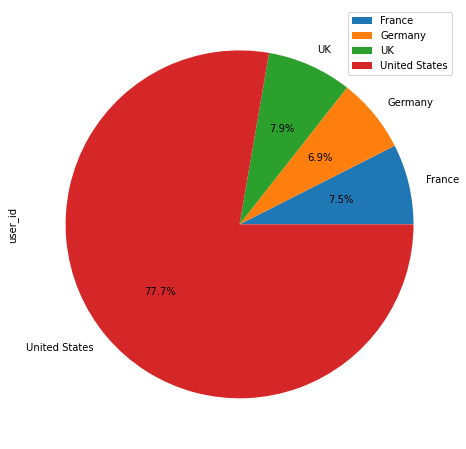

In [88]:
user_profiles.query('payer==True').groupby('region').agg({'user_id':'count'}).plot.pie(y='user_id', autopct='%.1f%%',figsize=(8, 8))
plt.show()

In [89]:
#отразим количество пользователей и долю платящих из каждой страны
region_pay = (
    user_profiles.groupby('region')
    .agg({'user_id':'count', 'payer':'mean'})
    .sort_values(by=['payer'], ascending=False)
    .rename(columns={'user_id': 'count'})
)
region_pay

,count,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


**Распределение пользователей по типам устройств**

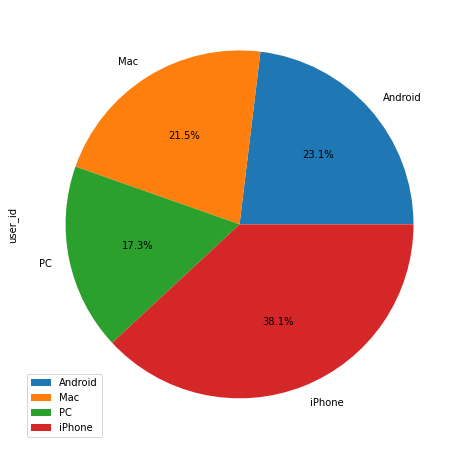

In [90]:
#распределение пользователей
user_profiles.query('payer==True').groupby('device').agg({'user_id':'count'}).plot.pie(y='user_id', autopct='%.1f%%',figsize=(8, 8))
plt.show()

In [91]:
#отразим долю платящих среди них
device_pay = (
    user_profiles.groupby('device')
    .agg({'user_id':'count', 'payer':'mean'})
    .sort_values(by=['payer'], ascending=False)
    .rename(columns={'user_id': 'count'})
)
device_pay

,count,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


**Распределение пользователей по каналам привлечения**

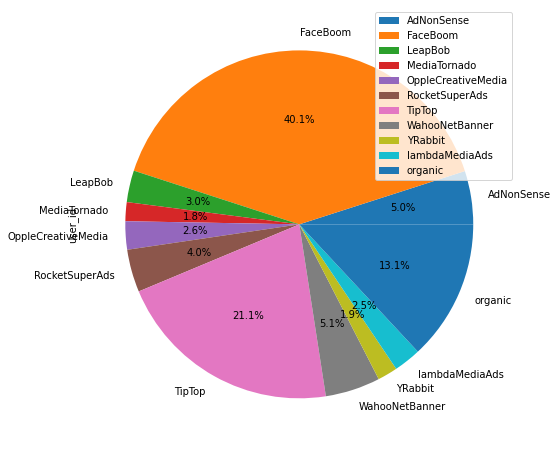

In [92]:
#отразим распределение пользователей по каналам привлечения
user_profiles.query('payer==True').groupby('channel').agg({'user_id':'count'}).plot.pie(y='user_id', autopct='%.1f%%',figsize=(8, 8))
plt.show()

In [93]:
#отразим долю плятящих пользователей из каждого канала
channel_pay = (
    user_profiles.groupby('channel')
    .agg({'user_id':'count', 'payer':'mean'})
    .sort_values(by=['payer'], ascending=False)
    .rename(columns={'user_id': 'count'})
)
channel_pay

,count,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


### Выводы:

- Пользователями приложения являются жители США, Германии, Великобритании, Франции. Больше других приложение используют жители Соединенных Штатов. Примерно одинаковое количество пользователей из Великобритании и Франции, меньше всего из Германии. Лучше всего конвертируются в платящих пользователей жители США (7%). Конвертация в других странах примерно одинаковая - около 4%. 
- Большая часть пользователей (38,1% ) совершили покупку с IPhone, вместе с тем конвертация в платящих пользователей выше у MAC и составляет 6,3% против  6,2 % (IPhone). Хуже конвертируются пользователи устройств Android (5,8 %) и PC (5%).
- Самую высокую конвертацию дает канал FaceBoom - 12%, пользотователи из данного канала составляют основу клиентов (40%). Вторую по численности группу платящих пользователей составляют пользователи из канала TipTop, однако их конвертация существенно хуже - 9,6%. Каналы AdNonSense и lambdaMediaAds дают более высокую конвертацию (11,3 % и 10,4%), однако доля этих пользователей среди клиентов невысокая (5% и 2.5%).

## Шаг 4. Маркетинг

Общая сумма затрат на рекламу: 105497


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


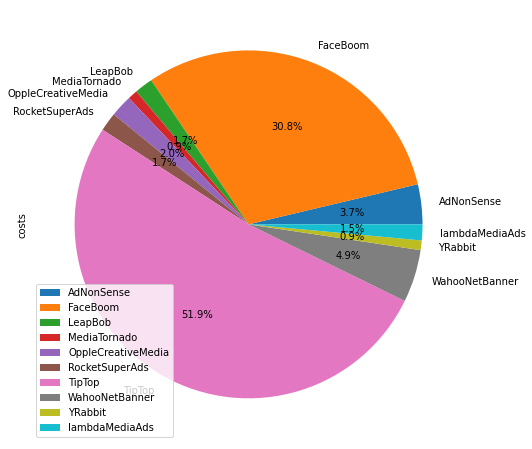

In [94]:
print('Общая сумма затрат на рекламу:', round(costs['costs'].sum()))
channel = costs.groupby('channel').agg({'costs':'sum'})
display(channel.sort_values(by='costs', ascending=False))
channel.plot.pie(y='costs', autopct='%.1f%%',figsize=(8, 8))
plt.show()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
10,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


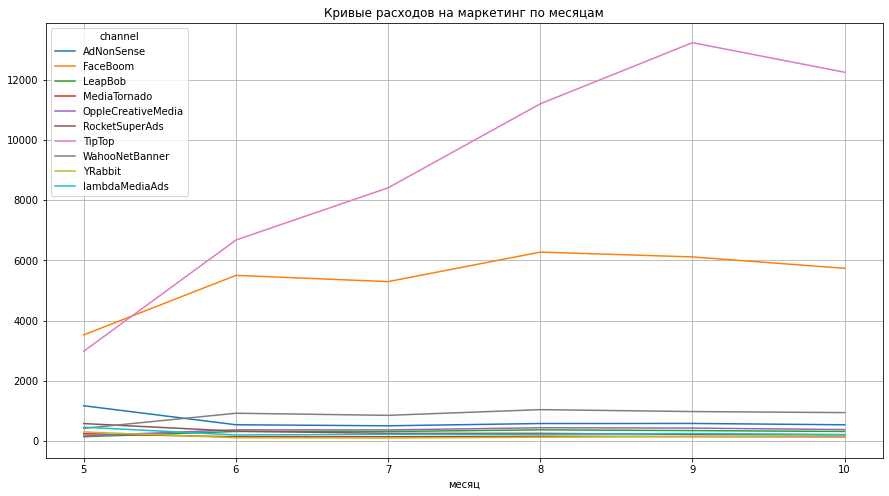

In [95]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
report = costs.pivot_table(index='month', columns='channel',values='costs', aggfunc='sum')
display(report.head(10))
report.plot(
    grid=True,   
    figsize=(15, 8)
)
plt.xlabel('месяц')  
plt.title('Кривые расходов на маркетинг по месяцам')  
plt.show()

In [96]:
def get_cac(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [97]:
prof_cac = get_cac(visits, orders, costs)
display(prof_cac.head())

#исключим органических пользователей
prof_cac = prof_cac.loc[prof_cac['channel']!='organic']
print('Средняя стоимость привлечения клиента:', prof_cac['acquisition_cost'].mean())
prof_cac.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Средняя стоимость привлечения клиента: 1.1274813239427588


,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


### Выводы:
- Общая сумма затрат на рекламу составляет 105497, из которых половина была вложена в канал TipTop, учитывая плохую конвертацию из этого канала, привлечение клиентов из данного канала стало самым дорогим для компании (2,8 за 1 клиента, что является значительно выше средних затрат на рекламную кампанию в других каналах). Вложения в канал TipTop стабильно увеличивались в течение всего изучаемого периода и были значительно выше остальных трат на маркетинг. 

## Шаг 5. Оценка окупаемости маркетинга 



**Установим момент и горизонт анализа данных**

In [98]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Оценка общей окупаемости рекламы

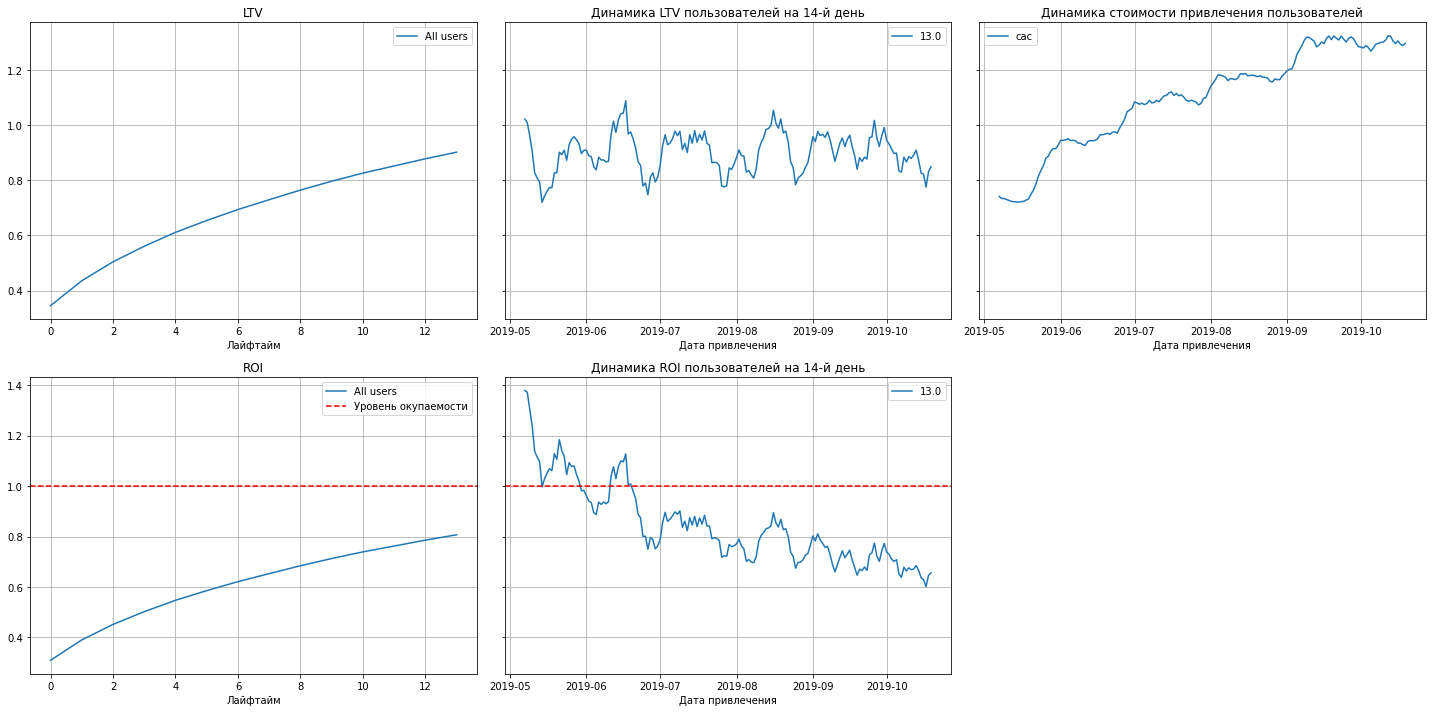

In [99]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_cac, orders, observation_date, horizon_days)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### По графикам можно сделать вывод:
 - на протяжении всего периода затраты на рекламную кампанию стабильно росли;
 - графики динамики стоимости привлечения пользователей и динамики ROI пользоватлей на конец горизонта анализа демонстрируют обратную корреляцию: с ростом затрат на маркетинг, окупаемость инвестиций снижалась;
 - в целом ни один пользователь не окупился в установленый бизнес-планом срок. ROI в конце второй недели около 80%.
 
Причиной неокупаемости рекламной кампании может быть черезмерно большой бюджет. Вкладывали больше, чем требовалось. 

Предварительные рекомендации - снизить рекламный бюджет. 

### Анализ окупаемости рекламы с разбивкой по устройствам

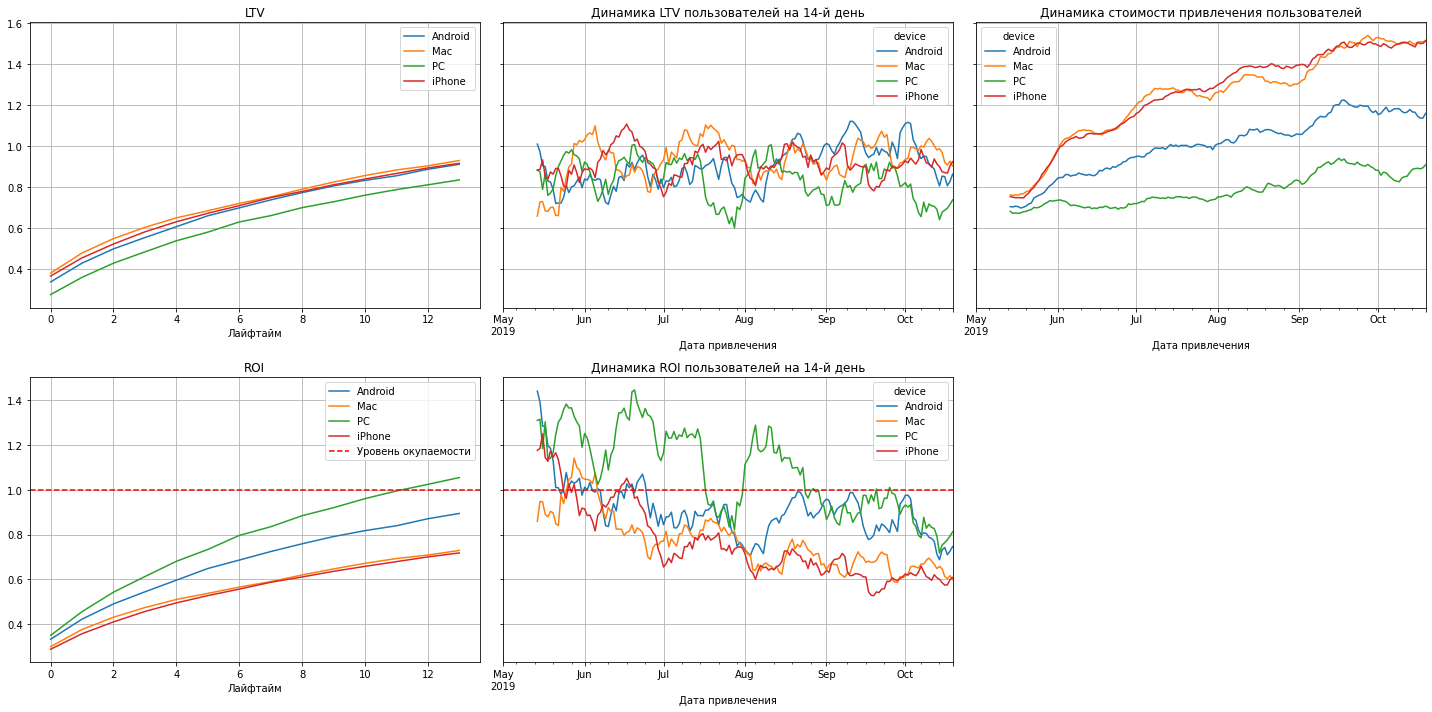

In [100]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_cac, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### По графикам можно сделать вывод:
 - на снижение окупаемости рекламы могут влиять пользователи MAC, IPhone, Android 
 - окупаемость рекламы зафиксирована у пользователей PC в период с мая по июль и с августа по сентябрь
 - затраты на привлечение пользователей устройств Apple самые высокие, вместе с тем ROI к концу второй недели едва достигает 70 %. 
 
Возможной причиной может быть некорретная работа приложений для Apple и Android 
 
Предварительные рекомендации - выявить техническую или иную причину низкой окупаемости пользователей устройств Apple.
 

### Проанализируйте окупаемость рекламы с разбивкой по странам

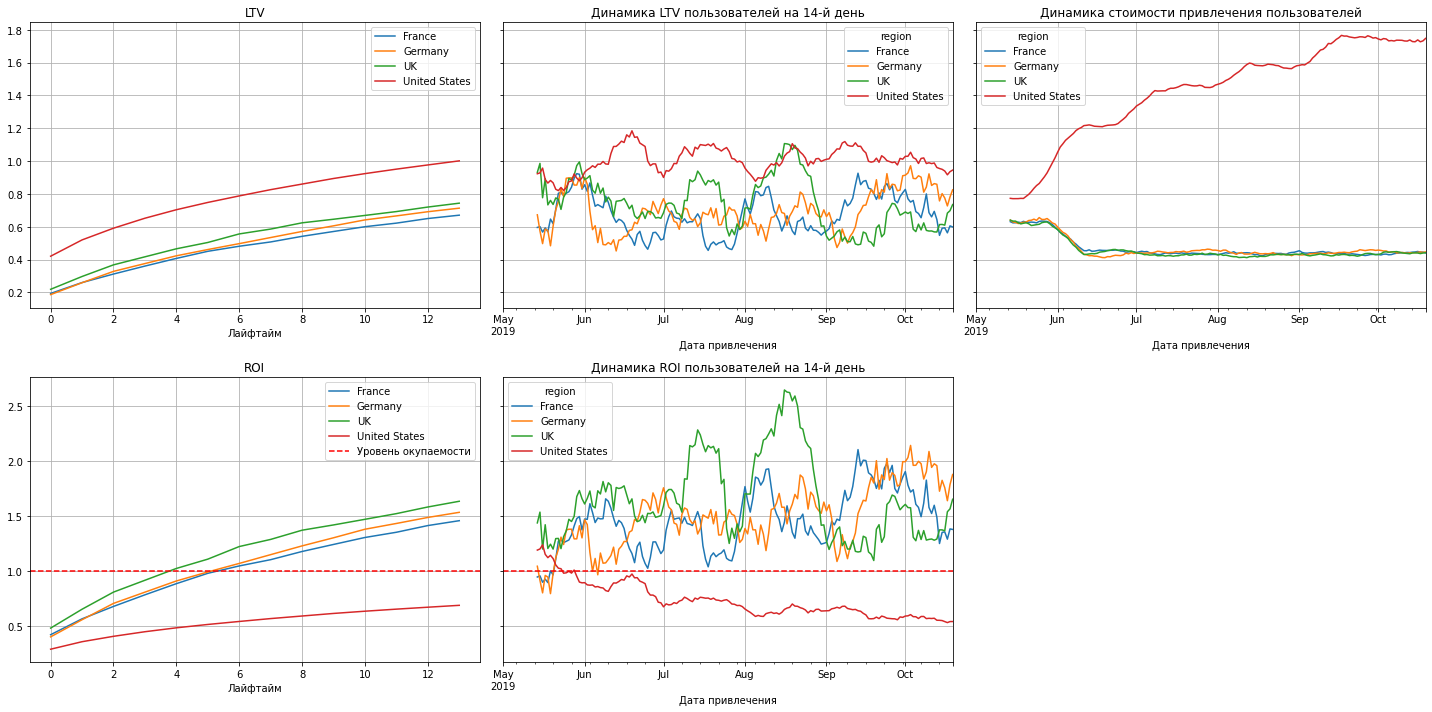

In [101]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_cac, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### По графикам можно сделать вывод:
 - несмотря на самый высокий LTV пользователей из Соединенных Штатов, средства на их привлечение стабильно не окупались 
 - рекламный бюджет увеличивался на привлечение только пользователей США
 - стабильно окупались вложения на привлечение пользователей из стран с меньшим количеством пользователей
 
 Предварительные рекомендации - пересмотреть распределение рекламного бюджета.

**Реклама в США**

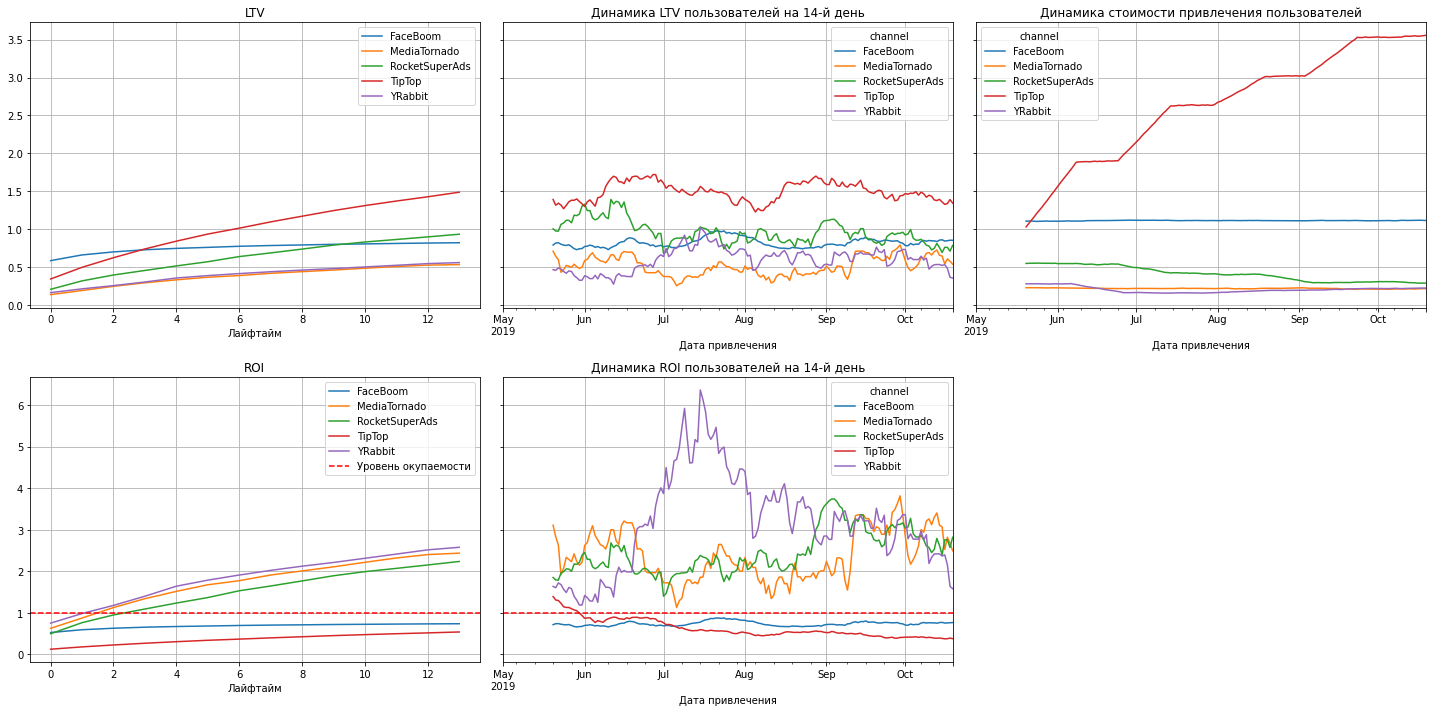

In [102]:
prof_usa = prof_cac.loc[prof_cac['region']=='United States']

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

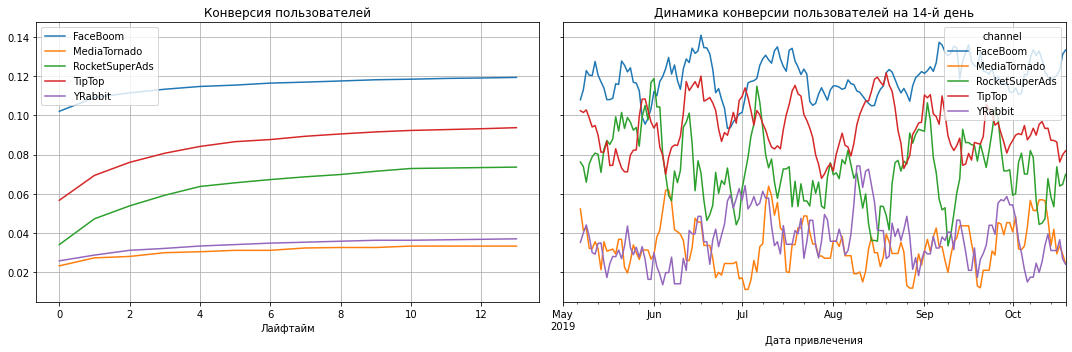

In [103]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

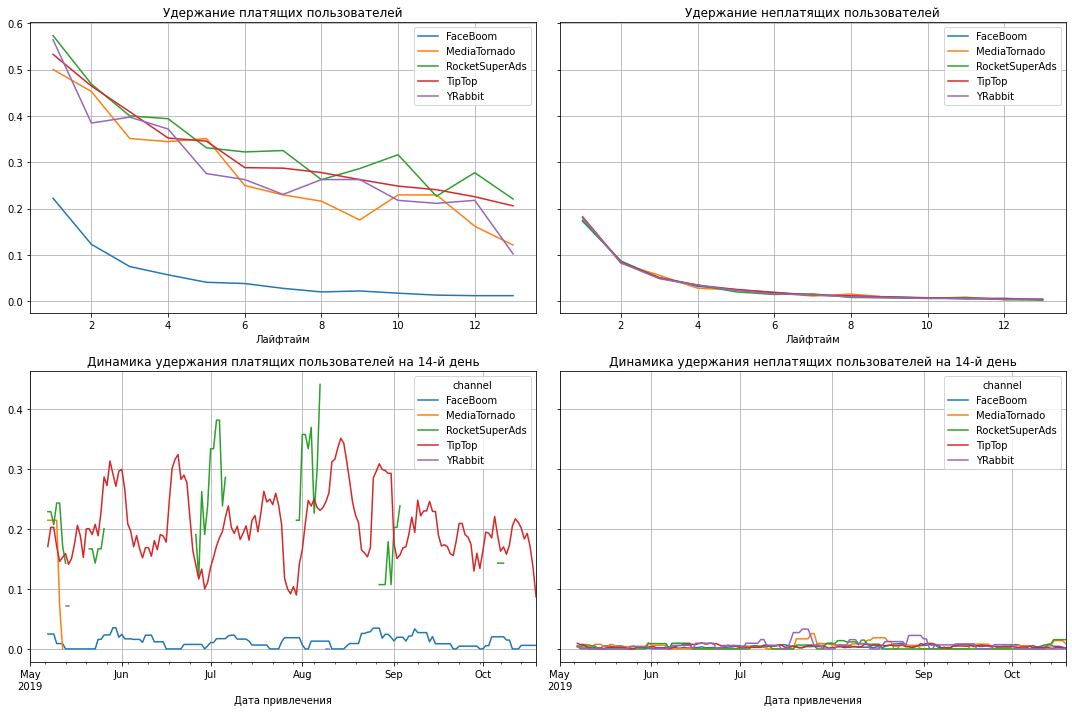

In [104]:
retention_raw, retention_grouped, retention_history = get_retention(
    prof_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Согласно графиками причиной неокупаемости рекламной кампании в США является вложение средств в убыточные каналы TipTop и FaceBoom (80 % рекламного бюджета). Самые дорогие клиенты не смогли не  компенсировать компании свое привлечение.
Вместе с тем не все каналы были убыточными. Так, например, каналы MediaTornado, RocketSuperAds, YRabbit смогли вернуть компании затраченные средства на привлечение и принести прибыль, в среднем каналы окупались на 2-3 день. Канал YRabbit в июле на пике принес компании прибыль, которая в 6 раз превышает затраты на свою рекламу. Канал RocketSuperAds показал хорошую конверсию и удержание клиентов. Однако прибыльные каналы не смогли компенсировать общий убыток, поскольку доля вложенных средств в эти каналы не превышала 8%. 

**Реклама в других странах**

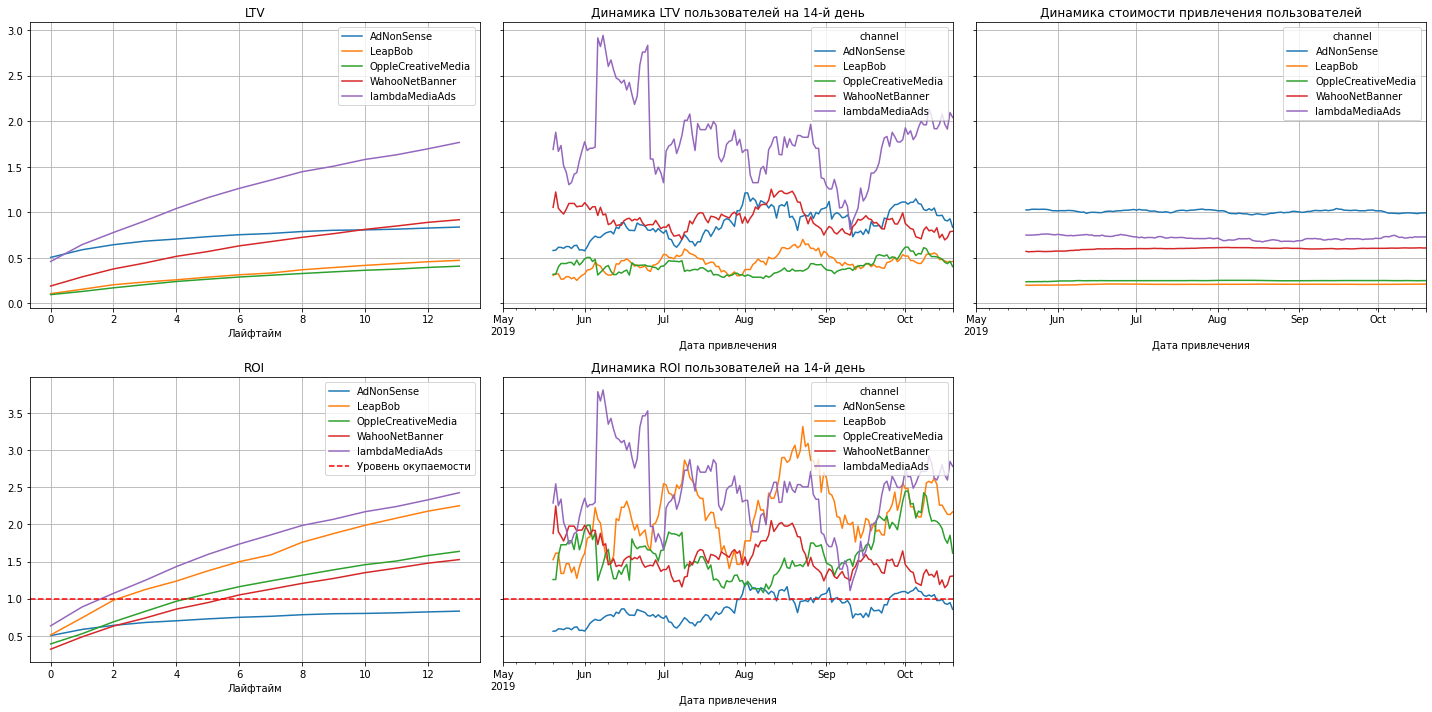

In [105]:
prof_other = prof_cac.loc[prof_cac['region']!='United States']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_other, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

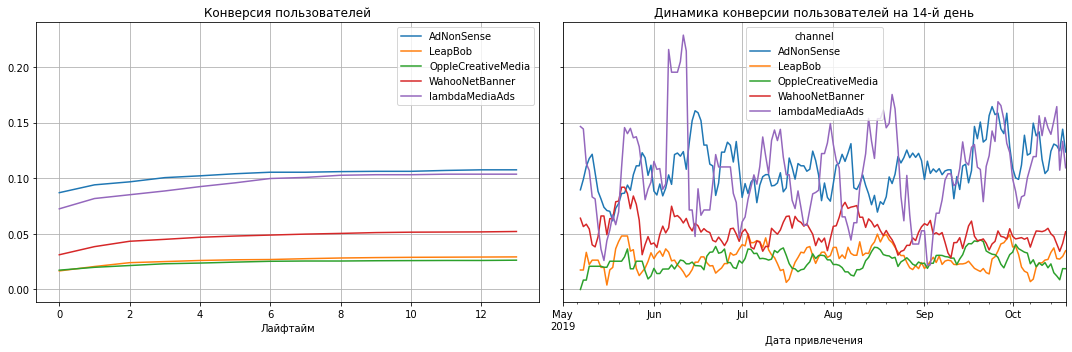

In [106]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof_other, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

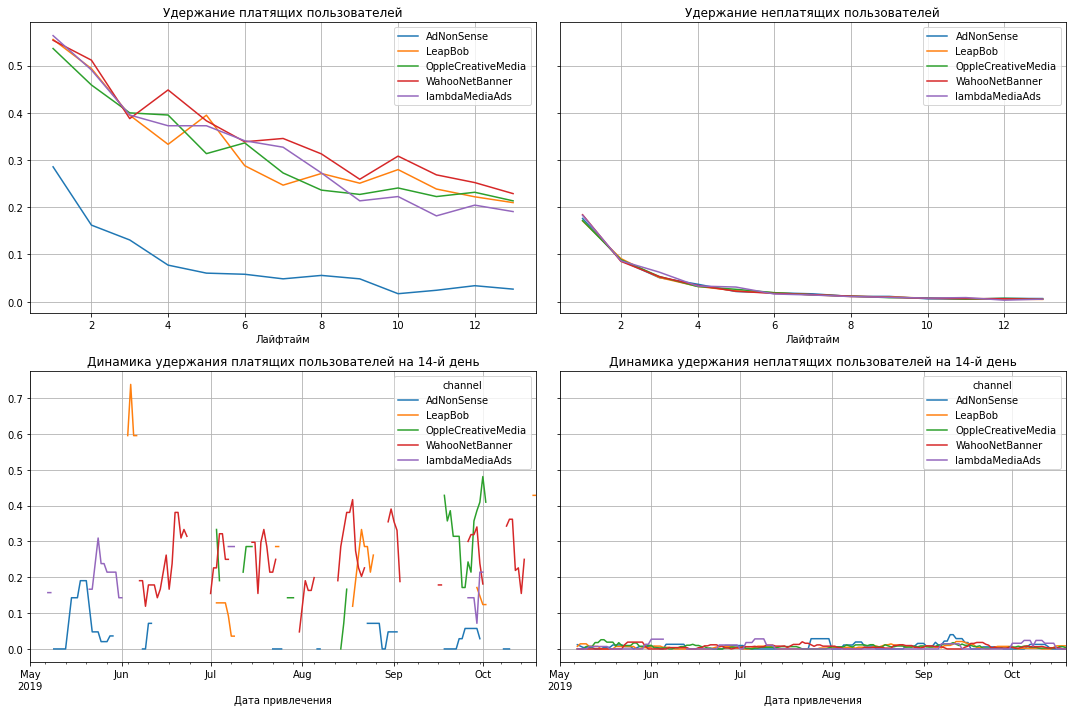

In [107]:
retention_raw, retention_grouped, retention_history = get_retention(
    prof_other, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

В Европейских странах также наблюдается убыточный канал -AdNonSense, который стабильно не окупался, однако на привлечение пользователей из этого канала  было затрачено всего 3,7% рекламного бюджета, что позволило более прибыльным каналам компенсировать убытки и в целом показть успешность рекламной кампании.
В среднем затраты на каналы 'LeapBob', 'WahooNetBanner', 'OppleCreativeMedia','lambdaMediaAds'окупались на 3-6 день.
Канал lambdaMediaAds на пике в июне приносил прибыль в 3,5 разы выше затрат. У данного канала также хорошая конвертация и удержание. 

*Чтобы проверить гипотезу о неисправности приложения для Apple, Android посмотрим на распределение платящих пользователей по странам, а также изучим графики окупаемости с разбивкой по утройствам в США и в Европейских странах*

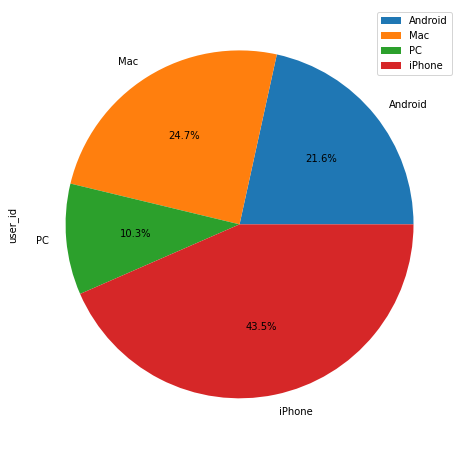

In [108]:
#пользователи США
prof_usa.query('payer==True').groupby('device').agg({'user_id':'count'}).plot.pie(y='user_id', autopct='%.1f%%',figsize=(8, 8))
plt.show()

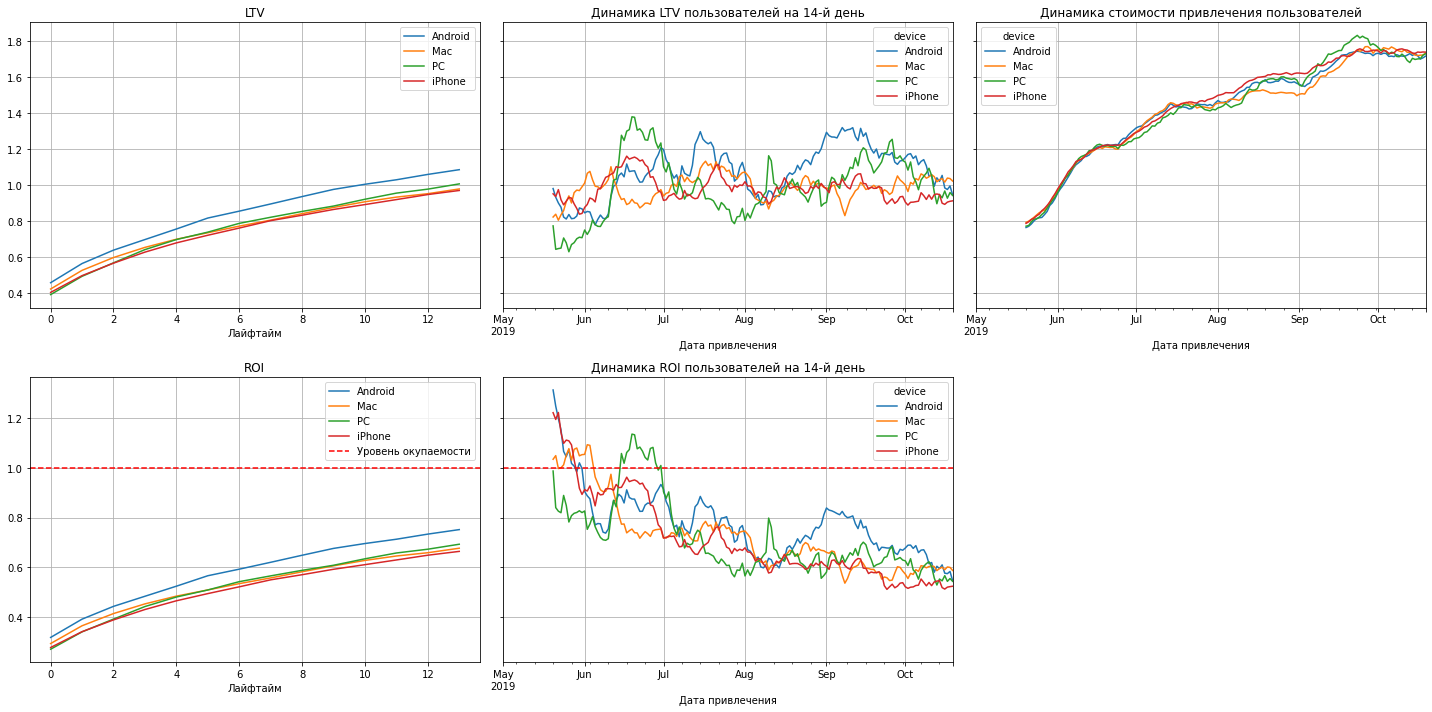

In [109]:
#пользователи США
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_usa, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

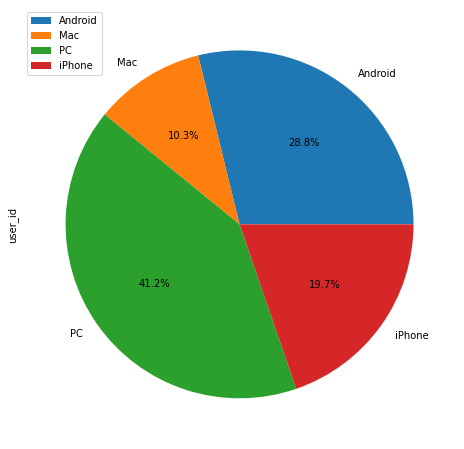

In [110]:
#пользователи Европейских стран
prof_other.query('payer==True').groupby('device').agg({'user_id':'count'}).plot.pie(y='user_id', autopct='%.1f%%',figsize=(8, 8))
plt.show()

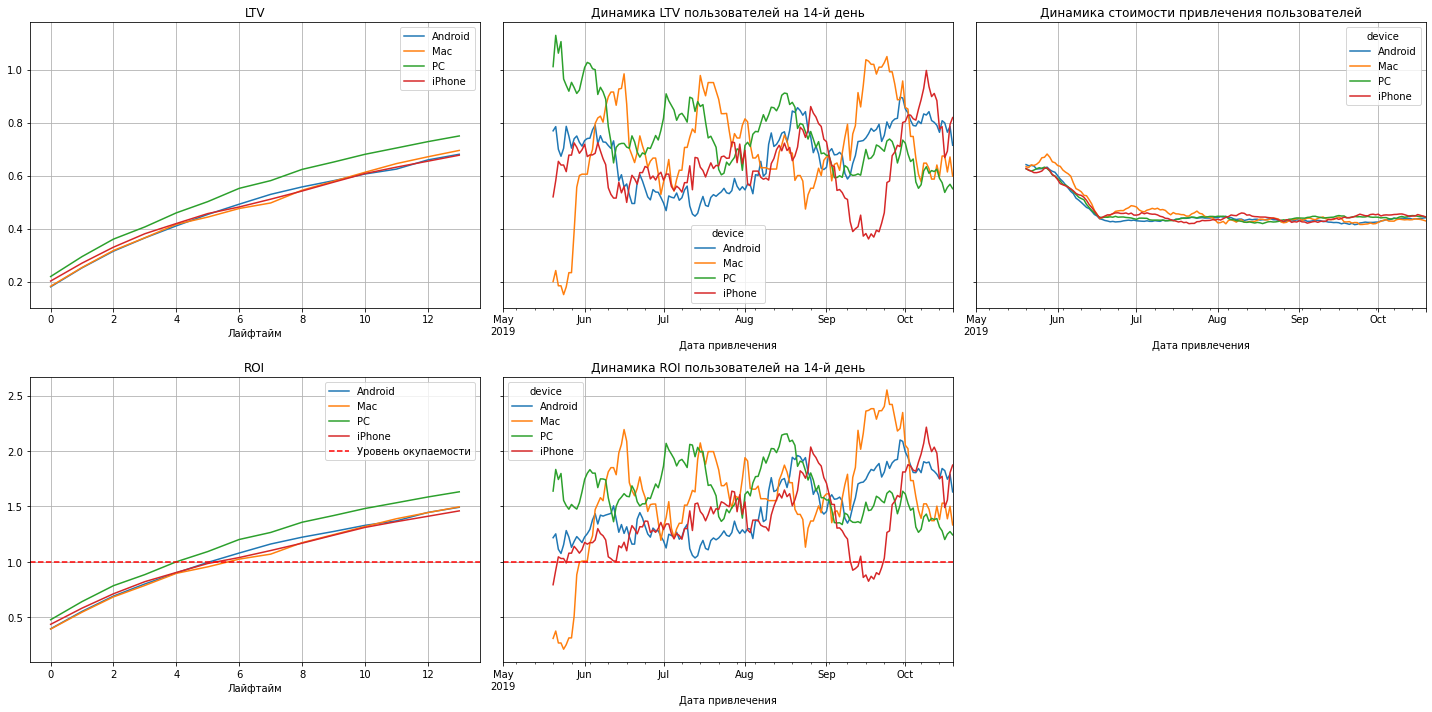

In [111]:
#пользователи Европы
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_other, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

Гипотеза о возможных проблемах технического характера приложения для устройст Apple, Android не подтвердилась. Привлеченные пользователи из Европы окупились на всех устройствах, если бы причины были в технической проблеме приложения, то на окупаемости пользователей из Европы это также бы сказалось. Причина окупаемости  пользователей с устройств PC связана с тем, что это были пользователи из Европы. Их доля составила 41% против 10% в США.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

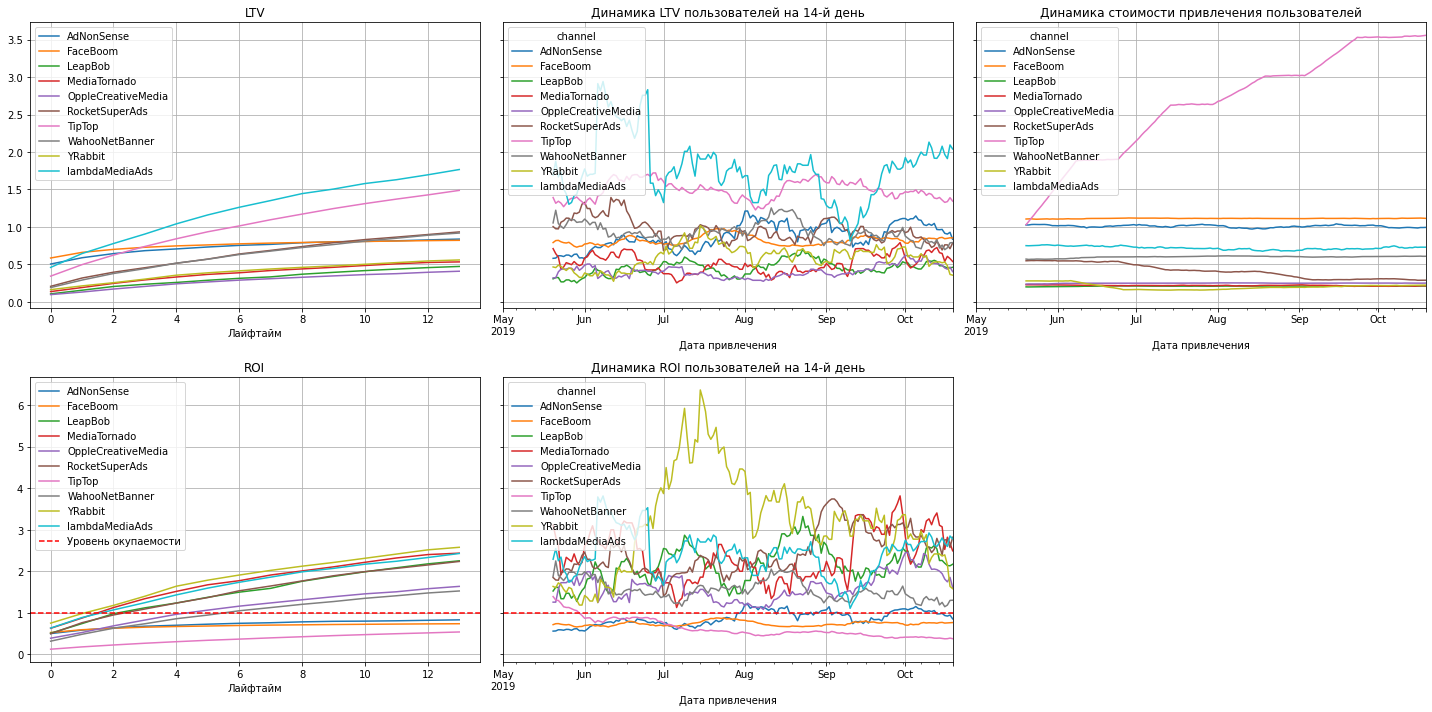

In [112]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof_cac, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
) 

#### По графикам можно сделать вывод:
 - самым убыточным каналом является TipTop, на который согласно графику динамики CAC на протяжение всего периода (с мая по ноябрь) шло увечение рекламного бюджета
 - также убыточными каналами стали FaceBoom, AdNonSense
 - каналы YRabbit, MediaTornado, lambdaMediaAds вышли на окупаемость уже со 3 дня, а к концу 2 недели окупаемость инвестиций достигла 2.5 раз.  
 
 Предварительные рекомендации - пересмотреть канал привлечения пользователей

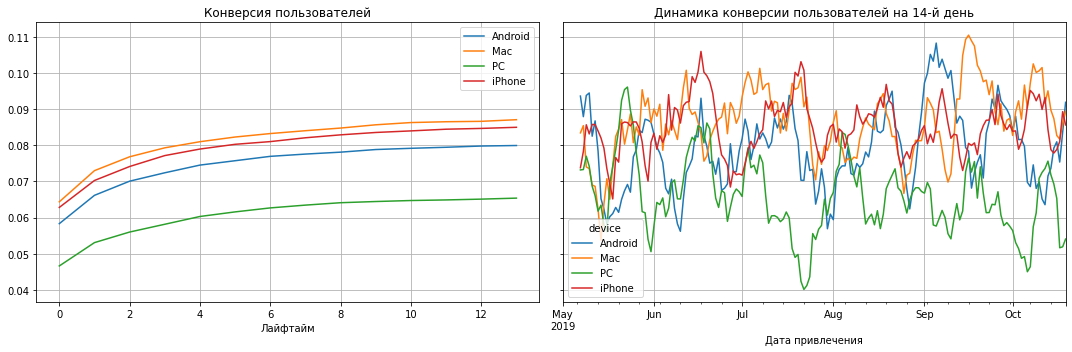

In [113]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof_cac, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

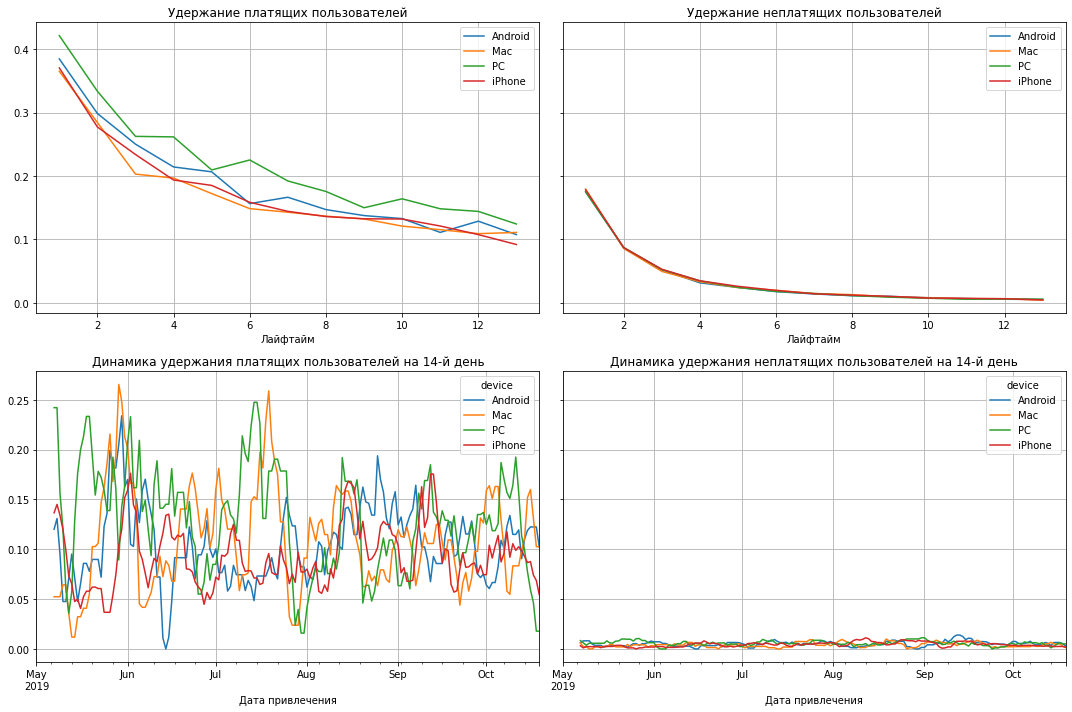

In [114]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    prof_cac, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Вывод

Пользователи MAC и IPhone хорошо конвертируются, но плохо удерживаются. Скорее всего, причина в некорретной работе приложения для данных устройств. Необходимо провести более тщательное "расследование".

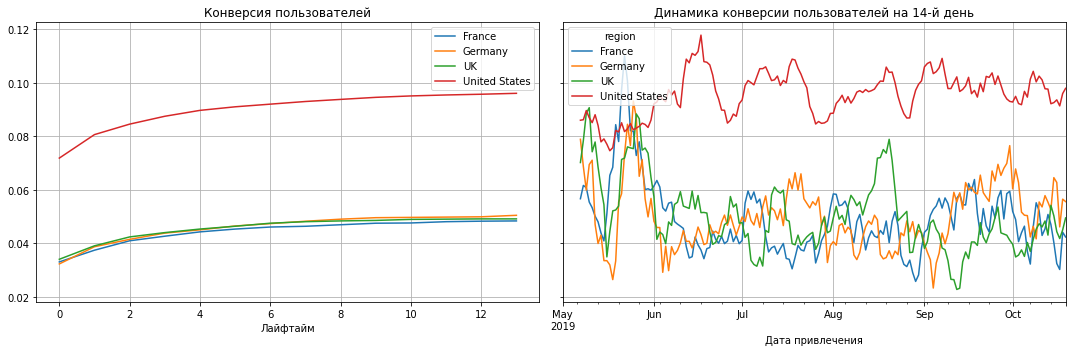

In [115]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof_cac, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

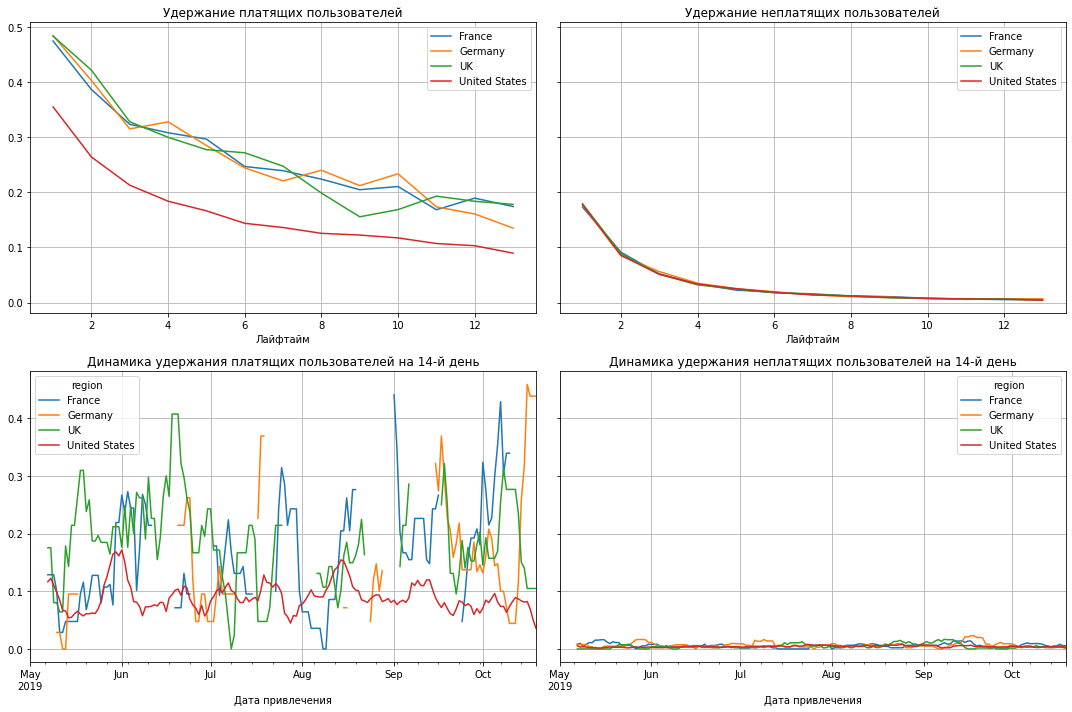

In [116]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    prof_cac, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Вывод:
Пользователи США конвертируются значительно лучше остальных пользователей, однако удерживаются хуже. Требуется также разобраться в данной проблеме, выявить причины, по которым уходят платящие пользователи из США.  

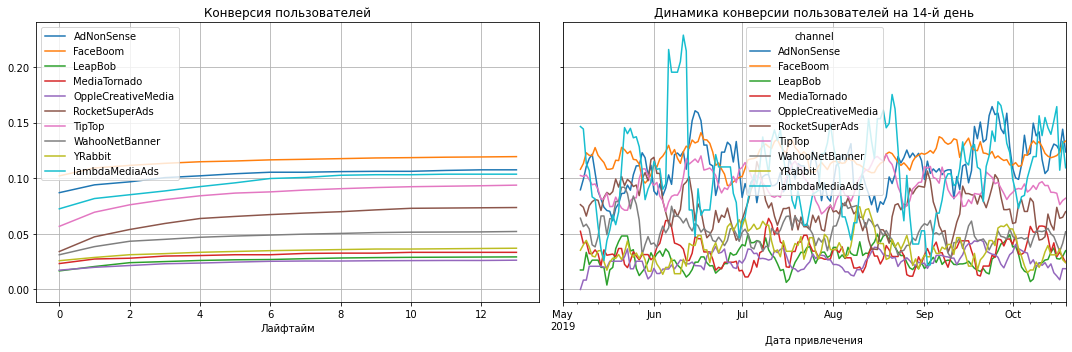

In [117]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof_cac, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

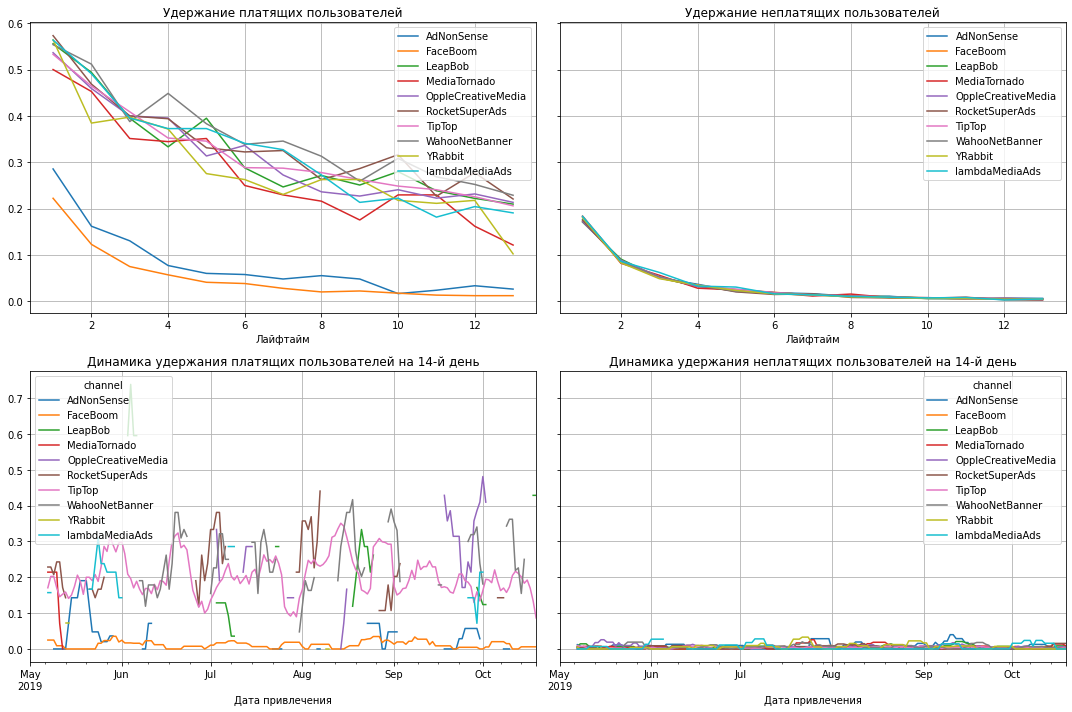

In [118]:
# смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    prof_cac, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Вывод
При хорошей конвертации пользователей из каналов FaceBoom и AdNonSense удержание очень низкое. Канал TipTop c дорогим привлечением пользователей дает более качественных клиентов.  

#### Выводы по оценке окупаемости рекламы
Причиной неэффективности привлечения пользователей стало вложение 80% рекламного бюджета в убыточные каналы FaceBoom и TipTop в США. Канал TipTop имел стабильно растущий CAC, а канал FaceBoom имел проблемы с удержанием.

Несмотря на убыточный канал AdNonSense рекламная кампания в странах Европы оказалась успешнее:  привлечение пользователей в среднем окупалось на 5-6 день. Причиной убыточности канала AdNonSense были проблемы с удержанием клиентов. 

Если оценивать окупаемость с разбивкой по устройствам, то окупились лишь пользователи с устройств PC. Изначально было предположение, что есть проблемы технического характера в приложении для устройств Apple, Android. Однако эта гипотеза не подтвердилась. Привлеченные пользователи из Европы окупились на всех устройствах, если бы причины были в технической проблеме приложения, то на окупаемости пользователей из Европы это также бы сказалось. Причина окупаемости  пользователей с устройств PC связана с тем, что это были в основном пользователи из Европы. Их доля составила 41% против 10% в США.

## Шаг 6. Общий вывод
В результате проведенного анализа удалось выявить причины плохой окупаемости рекламы. 
Основные каналы  для привлечения пользователей, на которые компания потратила 80% рекламного бюджета, оказались убыточными: TipTop привлекал очень дорогих клиентов,FaceBoom - некачественных клиентов с низким удержанием. Также рекламная кампания была ориентирована больше на США и не учла возможность большего вложения средств в привлечение пользователей из Европы, где рекламная кампания в отличии от США полностью окупилась.

Стоит отметить, что в США были и прибыльные каналы. Так, например, каналы MediaTornado, RocketSuperAds, YRabbit смогли вернуть компании затраченные средства на привлечение и принести прибыль, в среднем каналы окупались на 2-3 день. Канал YRabbit в июле на пике принес компании прибыль, которая в 6 раз превышает затраты на свою рекламу. Канал RocketSuperAds показал хорошую конверсию и удержание клиентов. Однако прибыльные каналы не смогли компенсировать общий убыток, поскольку доля вложенных средств в эти каналы не превышала 8%.

Таким образом, на основе полученных выводов можно составить рекомендации для отдела маркетинга в целях повышения эффективности рекламной кампании:
1. существенно сократить расходы на канал TipTop (совсем отказываться от популярного канала не стоит)
2. в качестве альтернативы увеличить расходы на каналы MediaTornado, RocketSuperAds, YRabbit. Приоритет отдать RocketSuperAds, тк у данного канала самая высокая конверсия и хорошее удержание клиентов
3. выяснить причину плохого удержания FaceBoom, сократить расходы на данный канал
4. перераспределить рекламный бюджет в пользу привлечения пользователей из Европы: в среднем затраты на каналы LeapBob', 'WahooNetBanner', 'OppleCreativeMedia','lambdaMediaAds'окупались на 3-6 день.  Наиболее подходящими источниками являются: lambdaMediaAds и WahooNetBanner, тк данные каналы имеют более высокую конвертацию и лучшее удержание пользователей
